Частина третя: Аналіз датасет c Kaggle.com


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
table = pd.read_csv('/content/drive/MyDrive/Data S/bestsellers with categories.csv')

In [3]:
table.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
table.shape

(550, 7)

In [5]:
#Відповідь: Про скільки книг зберігає дані датасет?
#550 книг

In [6]:
table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
table.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<Axes: title={'center': 'Рейтинг від користувачів в залежностів від Років'}, xlabel='user_rating', ylabel='reviews'>

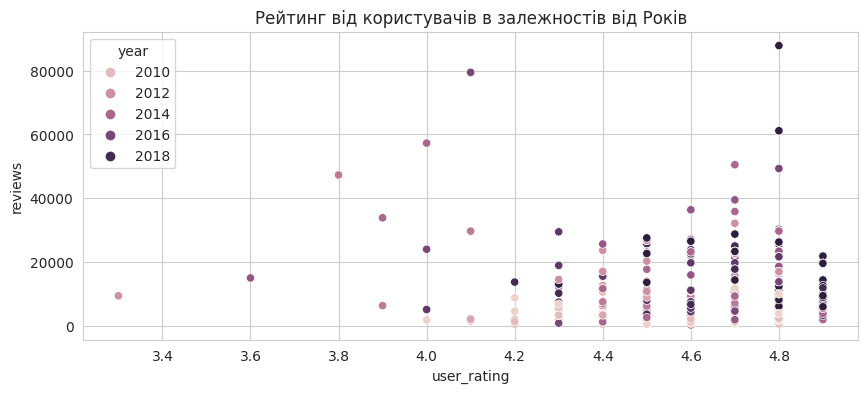

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title('Рейтинг від користувачів в залежностів від Років')
sns.scatterplot(data=table, x='user_rating', y='reviews', hue='year')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: title={'center': 'Рейтинг від користувачів в залежностів від Років'}, xlabel='user_rating', ylabel='reviews'>

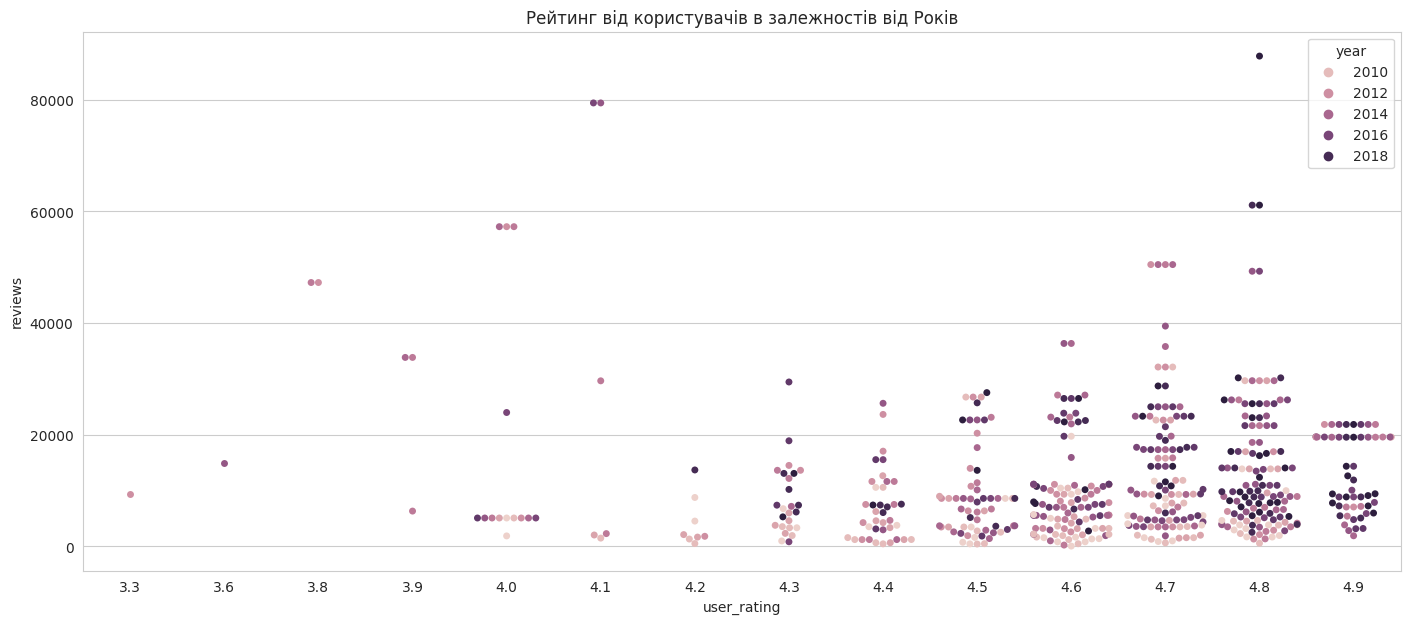

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(17,7))
plt.title('Рейтинг від користувачів в залежностів від Років')
sns.swarmplot(data=table, x='user_rating', y='reviews', hue='year')

<Axes: title={'center': 'Рейтинг жанрів книжок в залежностів від Років'}, xlabel='year', ylabel='user_rating'>

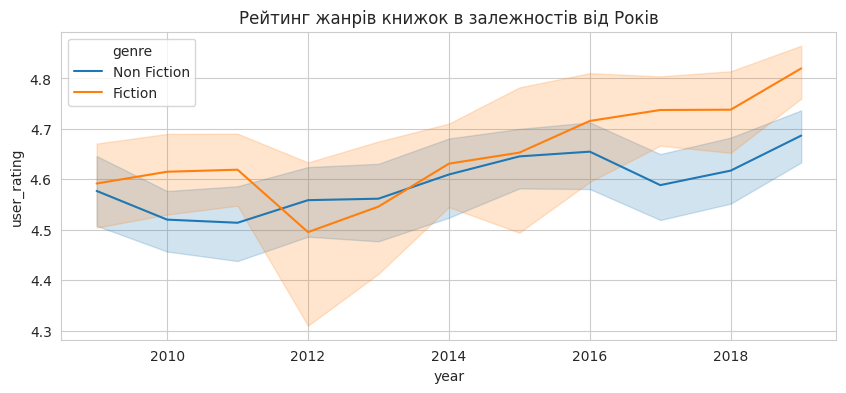

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title('Рейтинг жанрів книжок в залежностів від Років')
sns.lineplot(data=table, x='year', y='user_rating', hue='genre')

<Axes: title={'center': 'Ціни книжок в залежностів від Років'}, xlabel='price', ylabel='Count'>

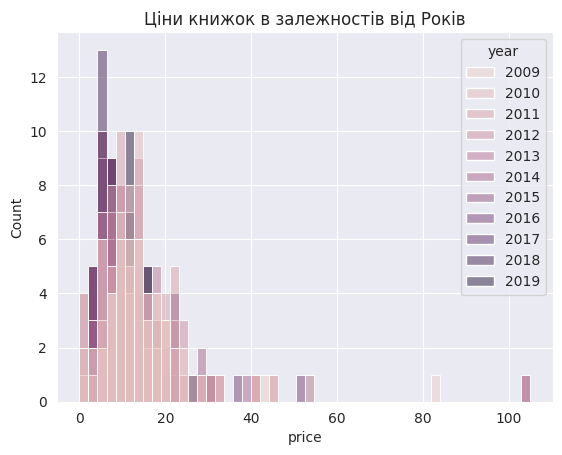

In [35]:
#table.info()
sns.set_style("darkgrid")
plt.title('Ціни книжок в залежностів від Років')
sns.histplot(data=table, x="price", bins=50, hue='year')

# Первинне дослідження даних

In [11]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
table.isna().sum()
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні) -- NO

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [12]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
print(table['genre'].unique())
print(table['genre'].nunique())
#Які є унікальні жанри? Non Fiction and Fiction

['Non Fiction' 'Fiction']
2


<Axes: title={'center': 'Розподіл цін на книжки'}, ylabel='Frequency'>

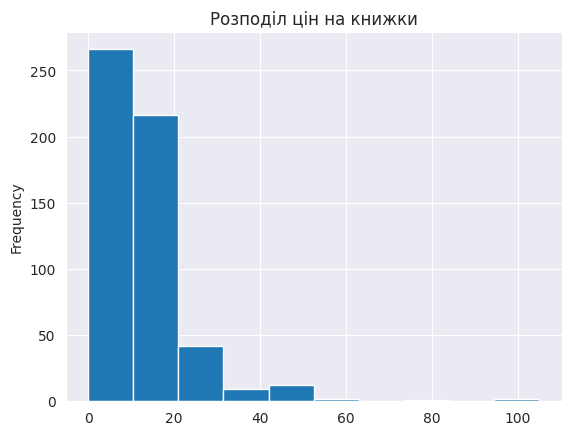

In [36]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
plt.title('Розподіл цін на книжки')
table['price'].plot(kind='hist')

In [14]:
table['price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

In [15]:
#Відповідь: Максимальна ціна? 105
#Відповідь: Мінімальна ціна? 0.00
#Відповідь: Середня ціна? 13.10
table['price'].median()
#Відповідь: Медіанна ціна? 11.0

11.0

# Пошук та сортування даних

In [16]:
table['user_rating'].max()
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

4.9

In [17]:
sum(table['user_rating'] == 4.9)
#Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

52

In [18]:
table2015=table[table['year']==2015]
table2015.sort_values('price', ascending=False).head()
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
#Відповідь: Publication Manual of the American Psychologic...

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128,23,2015,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction


In [19]:
print(sum((table['genre'] == 'Fiction') & (table['year'] == 2010)))
table[(table['genre'] == 'Fiction') & (table['year'] == 2010)].head()
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
#Відповідь: 20a

20


,name,author,user_rating,reviews,price,year,genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
56,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
61,Dead in the Family (Sookie Stackhouse/True Blo...,Charlaine Harris,4.3,1924,8,2010,Fiction
218,Little Bee: A Novel,Chris Cleave,4.1,1467,10,2010,Fiction
236,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction


In [20]:
table[(table['user_rating'] == 4.9) & ((table['year']==2010) | (table['year']==2011))]
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
#Відповідь: 1

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [21]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
#Відповідь: Яка книга остання у відсортованому списку? 
table[(table['year']==2015)& (table['price']<8)].sort_values('price',ascending=True ).tail()
#Відповідь: Old School (Diary of a Wimpy Kid #10)	

,name,author,user_rating,reviews,price,year,genre
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


# Агрегування даних та з'єднання таблиць

In [22]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
table.groupby('genre').agg({'price':['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [23]:
#Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
#Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
#Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
#Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

In [24]:
table.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [25]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
tab_author=table.groupby('author').agg({'name':'count'})
tab_author.sort_values('name', ascending=False)

,name
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
...,...
David Grann,1
Larry Schweikart,1
David McCullough,1


In [26]:
#Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248x1
#Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
#Відповідь: Скільки книг цього автора? Відповідь: 12

In [27]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
tab_author_rate=table.groupby('author').agg({'user_rating':'mean'})
tab_author_rate.sort_values('user_rating', ascending=True)

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


In [28]:
#Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
#Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

In [29]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
authors = pd.concat([tab_author,tab_author_rate], axis=1)
authors

,name,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [30]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
authors.sort_values(by=['name', 'user_rating'], ascending=True)

,name,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [31]:
#Відповідь: Який автор перший у списку? Muriel Barbery